In [130]:
import matplotlib.pyplot as plt
import signac
import numpy as np
import pandas as pd
from piecewise import piecewise_plot, piecewise
%matplotlib inline

In [79]:
data_path = "/home/mikehenry/epoxy-stuff/small_tg_npt"
project = signac.get_project(data_path)
jobs = project.find_jobs(filter={"bond": False})

0.0
30.0
50.0
70.0
100.0


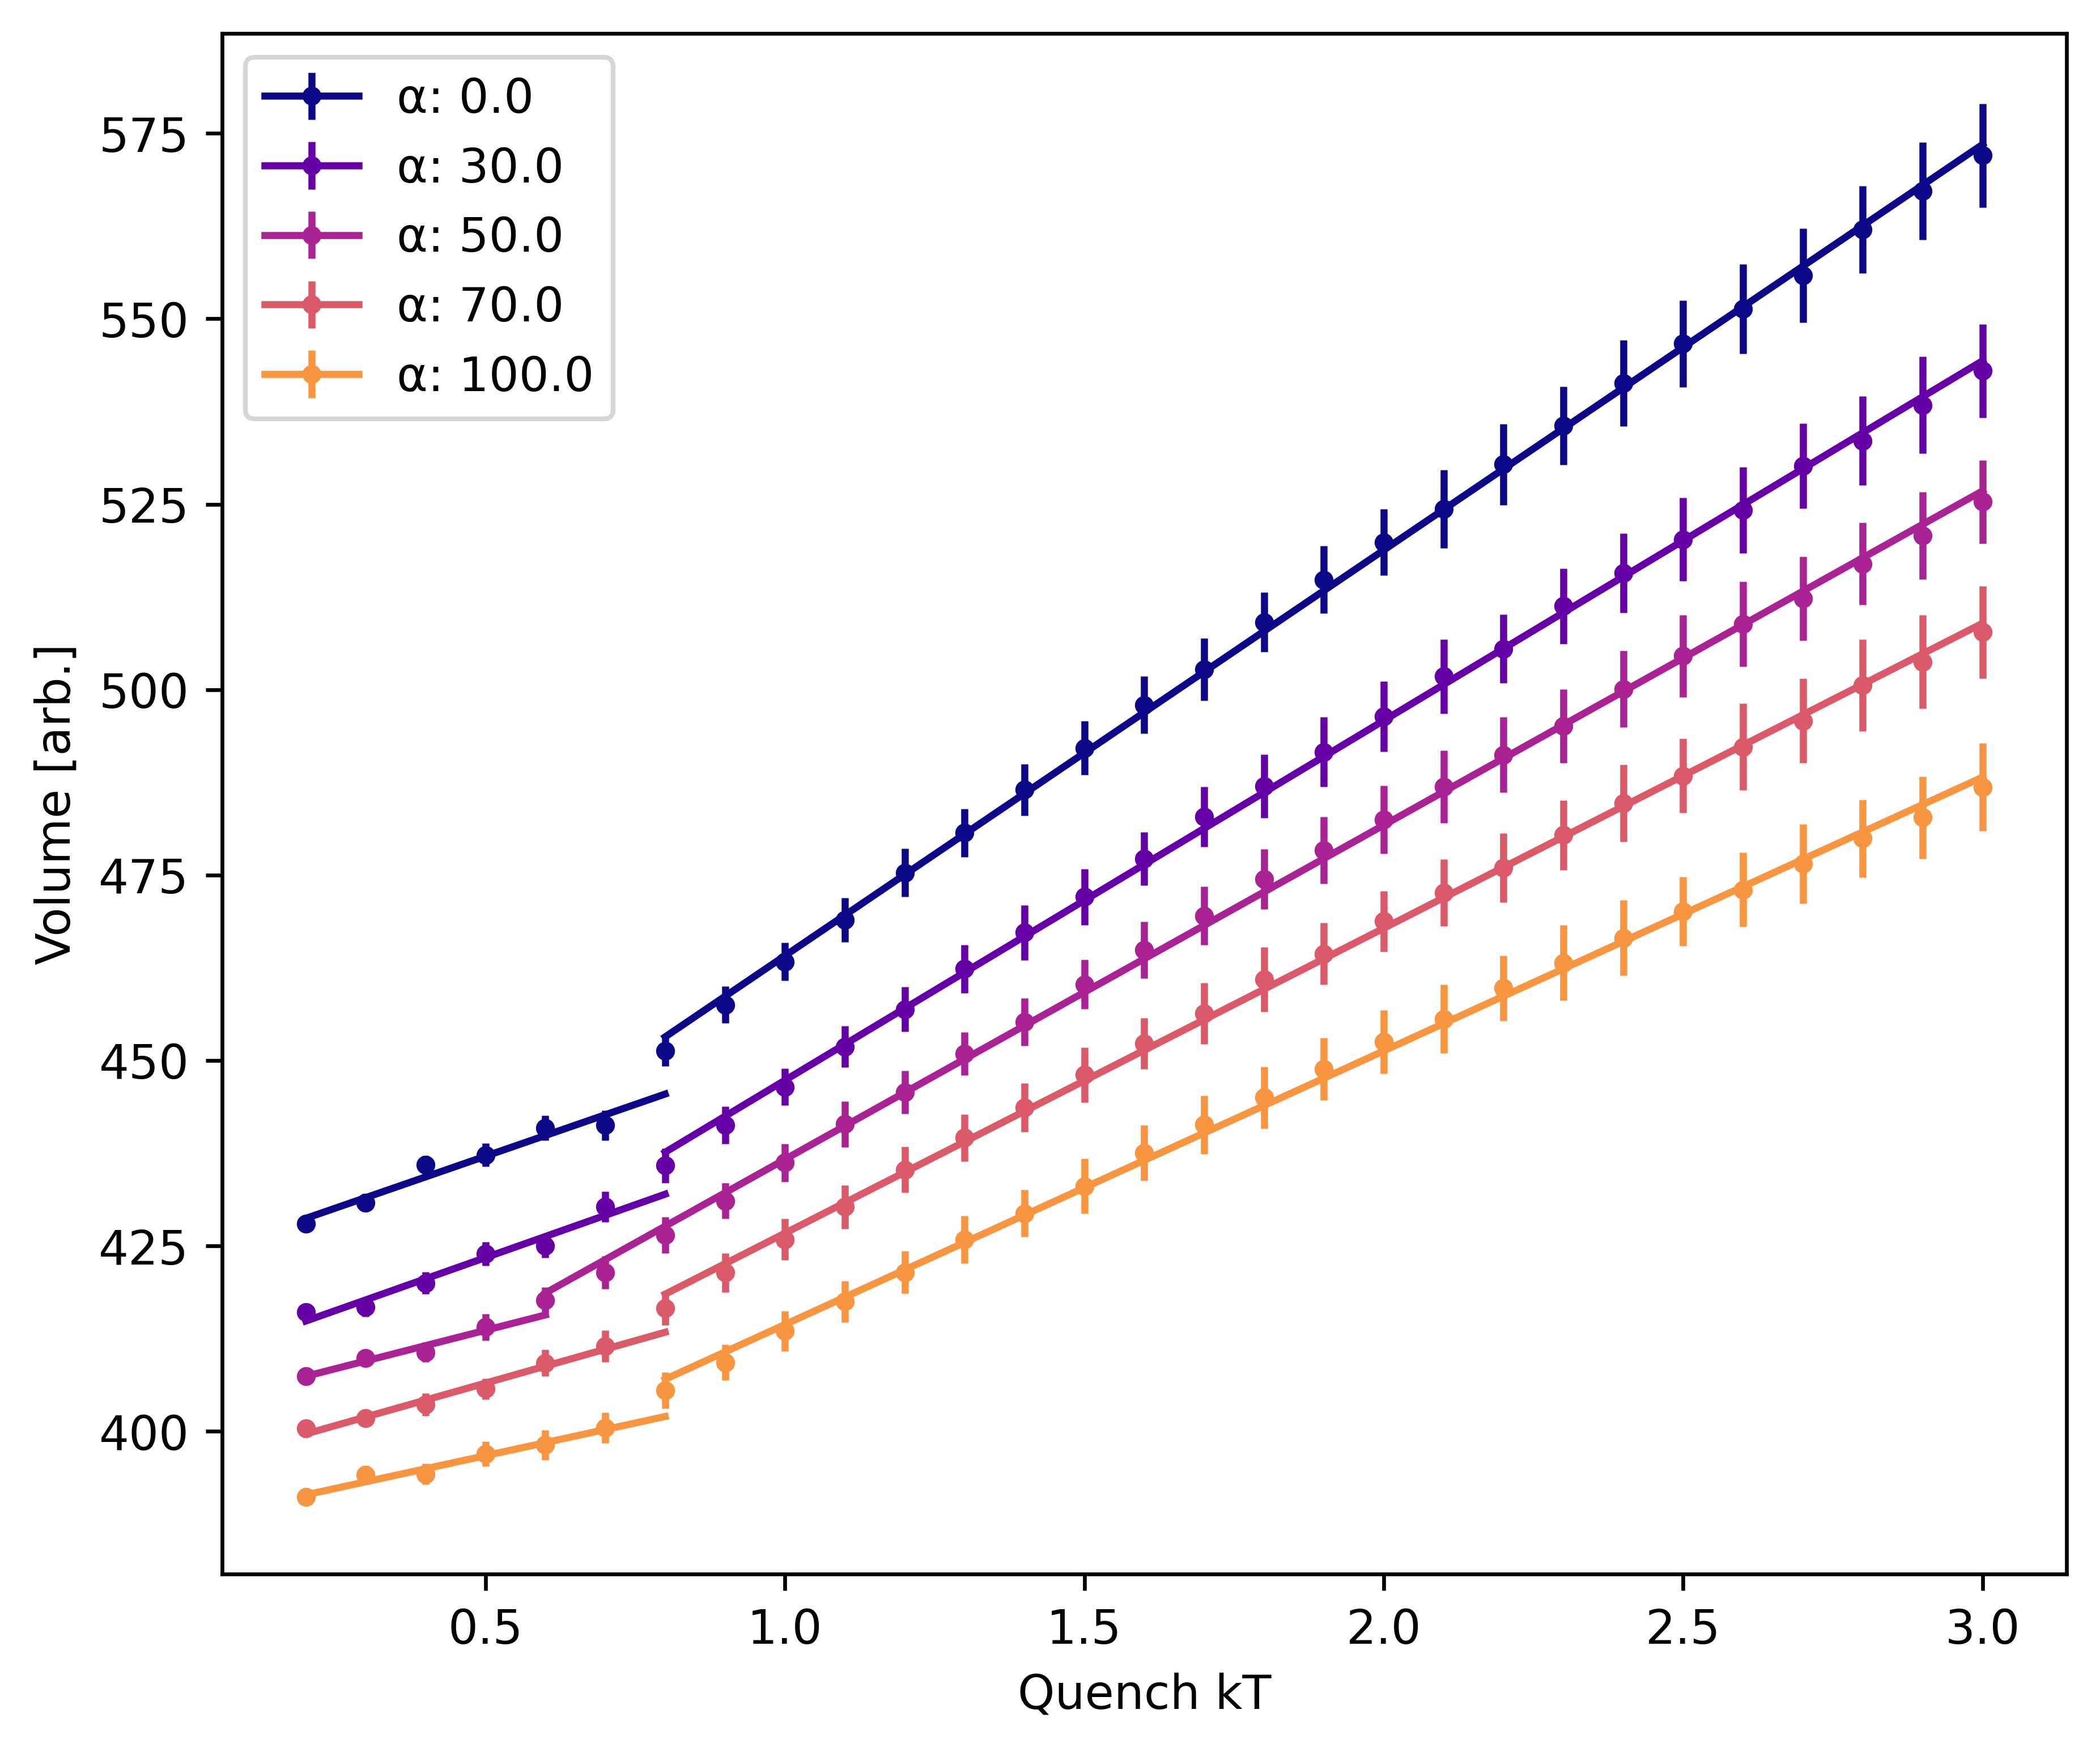

In [134]:
fig, ax = plt.subplots(dpi=600, figsize=(7, 6))

filter_saps = [0.0, 30.0, 50.0, 70.0, 100.0]
colors = plt.cm.plasma(np.linspace(0,0.75,len(filter_saps)))
quench_kTs = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]
i = 0
for alpha, job in jobs.groupby("stop_after_percent"):
    print(alpha)
    volumes = np.zeros(len(quench_kTs))
    for j in job:
        if j.sp.trial == 0:
            try:
                data = np.genfromtxt(j.fn("out.log"))
            except(OSError):
                continue
            d_slice = 800
            data = data[d_slice:]
            time_step, volume = data[:,0], data[:,1]
            m_volume = np.mean(volume)
            std_volume = np.std(volume)
            volumes[quench_kTs.index(j.sp.quench_T)] = m_volume
            ax.errorbar(j.sp.quench_T, m_volume, yerr=std_volume, color=colors[i], label=f"α: {alpha}", marker=".")
    model = piecewise(quench_kTs, volumes)
    for seg in model.segments:
        t_new = [seg.start_t, seg.end_t]
        v_hat = [seg.predict(t) for t in t_new]
        ax.plot(t_new, v_hat, color=colors[i])
    i += 1

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
ax.set_xlabel("Quench kT")
ax.set_ylabel("Volume [arb.]") 
plt.show()    

In [124]:
volumes

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [125]:
j.sp.quench_T

0.4

In [126]:
quench_kTs.index(j.sp.quench_T)

2

In [132]:
def y_vals(x, m, b):
    x = np.asarray(x)
    return m*x + b
            
dslice = 5
q_kT = quench_kTs[:5]
y = y_vals(q_kT, 30, 423)
ax.plot(q_kT, y, color=colors[0])

dslice = 5
q_kT = quench_kTs[len(q_kT):]
y = y_vals(q_kT, 55, 410)
ax.plot(q_kT, y, color=colors[0])